In [1]:
import yaml
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import traceback
from glob import glob

import sys
sys.path.append("../")

from electronfactors.inputs.convert_merge_guess import convert_merge_guess
from electronfactors.model.initialise import create_cache

from electronfactors.model.iteration import iteration, create_fit

from electronfactors.model.display_cutouts import display_cutout

from electronfactors.ellipse.equivalent import EquivalentEllipse

In [2]:
convert_merge_guess()

In [3]:
# energy_list = [6, 9, 12, 15, 18]
# app_list = [6, 10, 14, 20, 25]

energy_list = [18]
app_list = [10]

for energy in energy_list:
    for applicator in app_list:
        try:
            create_cache(energy=energy, applicator=applicator)
        except:
            print("Energy = %d\nApplicator = %d\n" % (energy, applicator))
            traceback.print_exc()

In [4]:
model_filepaths = glob("model_cache/*")



In [5]:
testpath = model_filepaths[1]
testpath

'model_cache/6MeV_14app_100ssd.yml'

In [6]:
# iteration(filepath=testpath, n=3, debug=True)

In [7]:
with open(testpath, 'r') as inputFile:
    input_dict = yaml.load(inputFile)
    
debug = True



In [8]:
label = [key for key in input_dict]
poi = [input_dict[key]['poi'] for key in label]

width = np.array([input_dict[key]['width'] for key in label])
length = np.array([input_dict[key]['length'] for key in label])
factor = np.array([input_dict[key]['factor'] for key in label])
fit = create_fit(width, length, factor)

In [9]:
min_radii = 0.5  # This is temporary

def circle_fit(radii):
    if radii >= min_radii:
        result = fit(radii*2, 2/radii)
    else:
        result = 0.
    return result

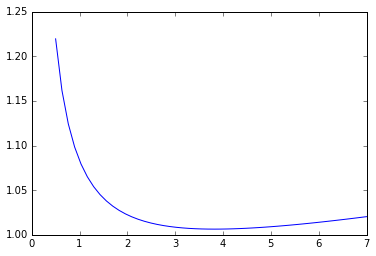

In [12]:
x = np.linspace(0.5, 7)
y = np.array([circle_fit(item) for item in x])

plt.plot(x, y)

In [ ]:
output_dict = dict()
for i, key in enumerate(label):
    if debug:
        print(str(key) + ":")
        sys.stdout.flush()

    XCoords = input_dict[key]['XCoords']
    YCoords = input_dict[key]['YCoords']

    equivalent_ellipse = EquivalentEllipse(
        x=XCoords, y=YCoords,
        circle_fit=circle_fit, n=3,
        min_distance=min_radii,
        poi=poi[i]
    )

    output_dict[key] = dict()
    output_dict[key]['width'] = equivalent_ellipse.width
    output_dict[key]['length'] = equivalent_ellipse.length

    if debug:
        display_cutout(width=equivalent_ellipse.width, 
                       length=equivalent_ellipse.length,
                       XCoords=XCoords, YCoords=YCoords,
                       factor=factor[i])
        sys.stdout.flush()

P36_1:


In [ ]:
# for filepath in model_filepaths:
#     try:
#         iteration(filepath=filepath, n=3)
#     except:
#         print("Energy = %d\nApplicator = %d\n" % (energy, applicator))
#         traceback.print_exc()
    

In [ ]:
model_filepaths[1]